In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
galton = Table.read_table('galton.csv')
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

### A Historical Example ###
Let's take another look at [Galton's data on heights](https://www.inferentialthinking.com/chapters/07/1/applying-a-function-to-a-column.html), studied in detail in Data 8. The table `heights` contains the midparent height and adult child's height for each of 934 adults.

In [3]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


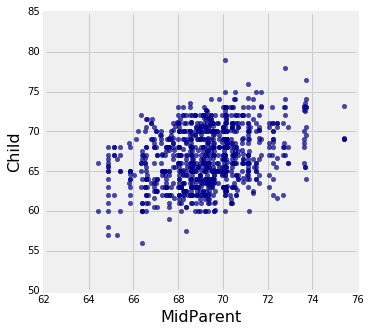

In [6]:
heights.scatter('MidParent')

You can see the classic bivariate normal histogram, though of course these heights are not in standard units.

To work with these data, let's redefine a few functions you defined in Data 8.

In [5]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x)*standard_units(y))

The correlation between the two variables is about 0.32.

In [10]:
midparent = heights.column(0)
child = heights.column(1)
r = correlation(midparent, child)
r

0.32094989606395924

The scatter plot below has a point for all of the 934 rows of `heights`. The variables are measured in standard units. The green regression line with an equation of $y = 0.322 x$ is displayed.

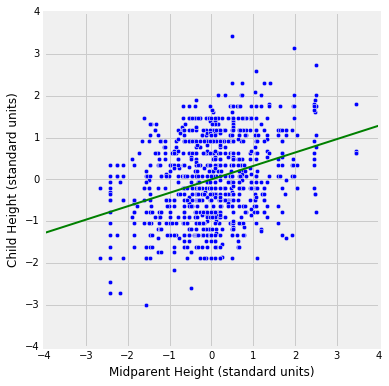

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(standard_units(midparent), standard_units(child))
plt.plot([-4, 4], [r*(-4), r*4], color='green', lw=2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.axes().set_aspect('equal')
plt.xlabel('Midparent Height (standard units)')
plt.ylabel('Child Height (standard units)');

It's a bit odd to make predictions a century after a data set was collected, but pretend that Galton met a new pair of parents whose midparent height is 71 inches. How could he have gone about predicting their child's height?

One way is to work in standard units. The midparent height of 71 inches is about 0.995 in standard units:

In [32]:
su_71 = (71 - np.mean(midparent))/np.std(midparent)
su_71

0.995460145967897

So the predicted child's height is $r \times 0.995 = 0.32$ standard units, approximately.

In [34]:
prediction_su = r * su_71
prediction_su

0.31949283038421022

The predicted child's height in 67.89 inches.

In [35]:
prediction_su * np.std(child) + np.mean(child)

67.888864234422755

To quantify the error in this estimate, use the fact that when both variables are measured in standard units, the SD of the errors is $\sqrt{1 - r^2}$. Therefore the SD of the errors, in inches, is $\sqrt{1 - r^2} SD(Y)$, which is 3.38 inches.


In [16]:
(1 - r**2)**0.5 * np.std(child)

3.3880799163953421

For comparison, the actual average midparent height of those whose midparents heights were near 71 inches is 67.2, compared to our regression estimate of 67.89. Not bad.

In [26]:
close_to_71 = heights.where('MidParent', are.between(70.9, 71.1))
close_to_71

MidParent,Child
71.06,66
71.06,64.5
71.06,64
70.91,73
70.91,72
70.91,72
70.91,66.5
70.91,69.2
70.91,67.2
70.91,66.5


In [27]:
np.mean(close_to_71.column('Child'))

67.200000000000017

The SD of the "Child"'s height of these people is 3.02, not far from the theoretical value of 3.38 that we arrived at by using the bivariate normal methods of the previous section.

In [28]:
np.std(close_to_71.column('Child'))

3.0213525826310681

### Scaling ###
In the calculations above, we used the bivariate normal distribution after standardizing the two heights involved. In general, random variables $X$ and $Y$ are said to have the *bivariate normal distribution with parameters $(\mu_X, \mu_Y, \sigma_X^2, \sigma_Y^2, \rho)$* provided the standardized variables

$$
X^* = \frac{X - \mu_X}{\sigma_X} ~~~~~~ \text{and} ~~~~~~
Y^* = \frac{Y - \mu_Y}{\sigma_Y}
$$

have the standard bivariate normal distribution with correlation $\rho$.

The standardization doesn't affect $\rho$ because correlation is defined in terms of the standardized variables in the first place.

### Best Predictor ###
We can now write out the general versions of the numerical calculations we did using Galton's data.

If $X$ and $Y$ have the bivariate normal distribution with the five parameters (two means, two variances, and correlation) as above, then it is easy to find the conditional distribution of $Y$ given $X = x$.

The given condition is equivalent to $X^* = x^* = (x - \mu_X)/\sigma_X$. Under this condition, the conditional distribution of $Y^*$ is normal with mean $\rho x^*$ and variance $1 - \rho^2$.

We can now reverse the standardization and use $Y = Y^*\sigma_Y + \mu_Y$ to get back to the units of $Y$. Given $X = x$, the conditional distribution of $Y$ is normal with mean

\begin{align*}
E(Y \mid X) ~ &= ~ (\rho x^*) \sigma_Y + \mu_Y \\
&= ~ \rho \frac{\sigma_Y}{\sigma_X} x + \big{(}\mu_Y - \rho \frac{\sigma_Y}{\sigma_X} \mu_X \big{)} \\
&= a^*x + b^*
\end{align*}

where $a^*$ and $b^*$ are the slope and the intercept of the regression line derived in an earlier chapter. 

Thus if $X$ and $Y$ have a bivariate normal distribution, then the best predictor of $Y$ given $X$ is linear and is therefore the same as the best linear predictor or regression line.

The conditional variance $Var(Y \mid X = x)$ is unaffected by the shift by $\mu_Y$. Therefore

$$
Var(Y \mid X = x) ~ = ~ (1 - \rho^2)\sigma_Y^2 ~~~~~~ \text{and} ~~~~~~
SD(Y \mid X = x) ~ = ~ \sqrt{1 - \rho^2}\sigma_Y
$$